# About the dataset

### Columns in the Dataset:

1.  **age**:
    
    -   **Description**: Age of the individual in years.
    -   **Data type**: Integer.
2.  **sex**:
    
    -   **Description**: Gender of the individual.
        -   1 = Male
        -   0 = Female
    -   **Data type**: Integer (binary categorical).
3.  **cp (Chest Pain Type)**:
    
    -   **Description**: Type of chest pain experienced by the individual.
        -   0 = Typical angina
        -   1 = Atypical angina
        -   2 = Non-anginal pain
        -   3 = Asymptomatic (no chest pain)
    -   **Data type**: Integer (categorical).
4.  **trestbps (Resting Blood Pressure)**:
    
    -   **Description**: The individual’s resting blood pressure (in mm Hg) at the time of the exam.
    -   **Data type**: Integer.
5.  **chol (Serum Cholesterol)**:
    
    -   **Description**: Serum cholesterol level in mg/dl.
    -   **Data type**: Integer.
6.  **fbs (Fasting Blood Sugar)**:
    
    -   **Description**: Fasting blood sugar level.
        -   1 = Fasting blood sugar > 120 mg/dl (indicating a possible high blood sugar level)
        -   0 = Fasting blood sugar ≤ 120 mg/dl
    -   **Data type**: Integer (binary categorical).
7.  **restecg (Resting Electrocardiographic Results)**:
    
    -   **Description**: The resting electrocardiogram results.
        -   0 = Normal
        -   1 = ST-T wave abnormality
        -   2 = Left ventricular hypertrophy (LVH)
    -   **Data type**: Integer (categorical).
8.  **thalach (Maximum Heart Rate Achieved)**:
    
    -   **Description**: The maximum heart rate the individual was able to achieve during exercise.
    -   **Data type**: Integer.
9.  **exang (Exercise Induced Angina)**:
    
    -   **Description**: Whether the individual experienced angina during exercise.
        -   1 = Yes
        -   0 = No
    -   **Data type**: Integer (binary categorical).
10.  **oldpeak (Depression Induced by Exercise)**:
    
    -   **Description**: The depression in the ST segment induced by exercise relative to rest (measured in mm). A higher value can indicate a more severe response, which might suggest heart disease.
    -   **Data type**: Float (continuous).
11.  **slope (Slope of Peak Exercise ST Segment)**:
    
    -   **Description**: The slope of the ST segment during peak exercise.
        -   0 = Upsloping
        -   1 = Flat
        -   2 = Downsloping
    -   **Data type**: Integer (categorical).
12.  **ca (Number of Major Vessels Colored by Fluoroscopy)**:
    
    -   **Description**: Number of major vessels (0-3) visible during fluoroscopy. This indicates the extent of coronary artery disease.
    -   **Data type**: Integer.
13.  **thal (Thalassemia)**:
    
    -   **Description**: The thalassemia type.
        -   3 = Normal
        -   6 = Fixed defect
        -   7 = Reversable defect
    -   **Data type**: Integer (categorical).
14.  **target (Heart Disease Presence)**:
    
    -   **Description**: The target variable indicating whether the individual has heart disease.
        -   0 = No heart disease
        -   1 = Presence of heart disease
    -   **Data type**: Integer (binary categorical).
    -   This is the **target variable** of interest. We would use this column to predict the likelihood of heart disease (based on the other features).

----------

### Target Variable:

The **target variable** in this dataset is **`target`**. This column is the one we aim to predict or classify based on the other features. It indicates the presence of heart disease:

-   **0** means the individual does not have heart disease.
-   **1** means the individual has heart disease.

So, this dataset is structured for a **binary classification task**

# 1. Data Loading and Exploration

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Datasets/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
np.array(df.columns)

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## i) Null values

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
cols = df.columns

In [15]:
mean_values = df[cols].mean()
median_values = df[cols].median()
std_values = df[cols].std()
quartiles = df[cols].quantile([0.25, 0.5, 0.75])

print (mean_values)
print (median_values)
print (std_values)
print (quartiles)

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64
age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64
age          9.072290
sex          0.460373
cp           1.029641
trestbps    17.516718
chol        51.592510
fbs          0.356527
restecg      0.527878
thalach     23.005724
exang        0.472772
oldpeak      1.175053
slope        0.617755
ca           1.030798
thal         0.620660
target       0.500070
dtype: float64
       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldp

In [17]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


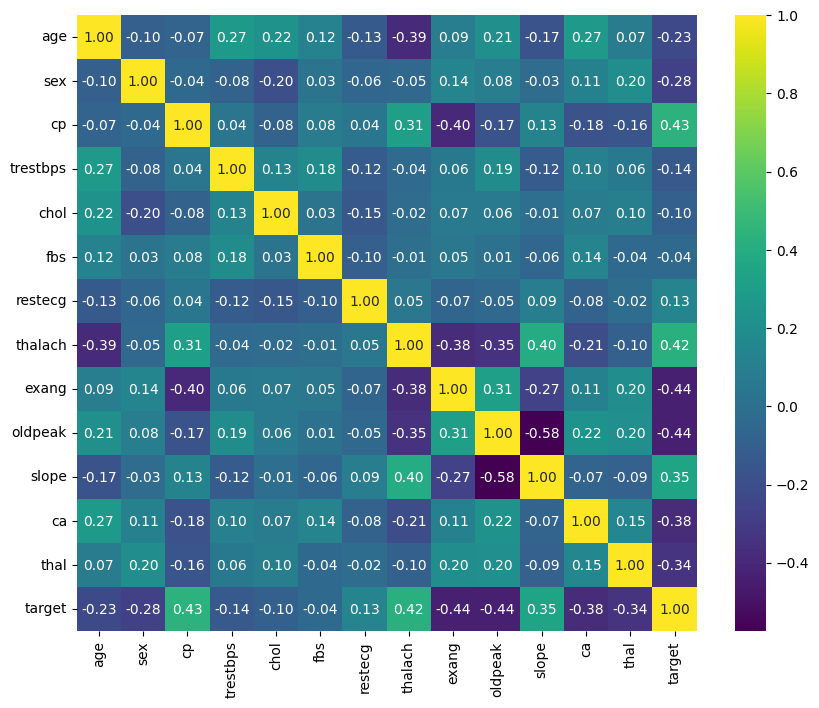

In [21]:
#Heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap= 'viridis')
plt.show()


## Key Insights:

**Target Variable Correlations**:

-   The target variable (heart disease presence) has a **moderate positive correlation** with the following features:
    -   **cp (Chest Pain Type)**: **0.434854**
        -   Chest pain type has a moderate positive correlation with the target variable. This suggests that certain types of chest pain may be a good indicator of heart disease.
    -   **thalach (Maximum Heart Rate Achieved)**: **0.422895**
        -   Maximum heart rate is positively correlated with the target, which implies that individuals with higher heart rates during exercise may be more likely to have heart disease.
    -   **exang (Exercise Induced Angina)**: **-0.438029**
        -   Exercise-induced angina (angina during exercise) is **negatively correlated** with the target, suggesting that individuals who experience angina during exercise are more likely to have heart disease. This negative correlation is significant, as it might be a strong predictor.
    -   **oldpeak (Depression Induced by Exercise)**: **-0.438441**
        -   The **negative correlation** between oldpeak (depression in the ST segment during exercise) and the target variable indicates that higher levels of depression in the ST segment (which can be a sign of ischemia) are associated with heart disease.
    -   **slope (Slope of Peak Exercise ST Segment)**: **0.345512**
        -   The slope of the ST segment also has a moderate positive correlation with heart disease, with higher values potentially indicating more severe heart conditions.
     

**Feature-to-Feature Correlations**:

-   **Highly Correlated Features**:
    -   **cp** and **thalach** have a moderate positive correlation (**0.306839**). This suggests that people with more severe chest pain might have lower maximum heart rates.
    -   **oldpeak** has a **moderate negative correlation** with **slope** (**-0.575189**), suggesting that a lower slope (downsloping ST segment during peak exercise) is associated with greater depression in the ST segment, which is a sign of heart disease.

# 3. Data Visualization:
- Create histograms for at least 5 numerical features to understand their
distribution.
- Create box plots for the same 5 features to identify outliers.
- Visualize the relationship between the target variable and a few key features
using scatter plots or bar charts.

<Figure size 20000x17000 with 0 Axes>

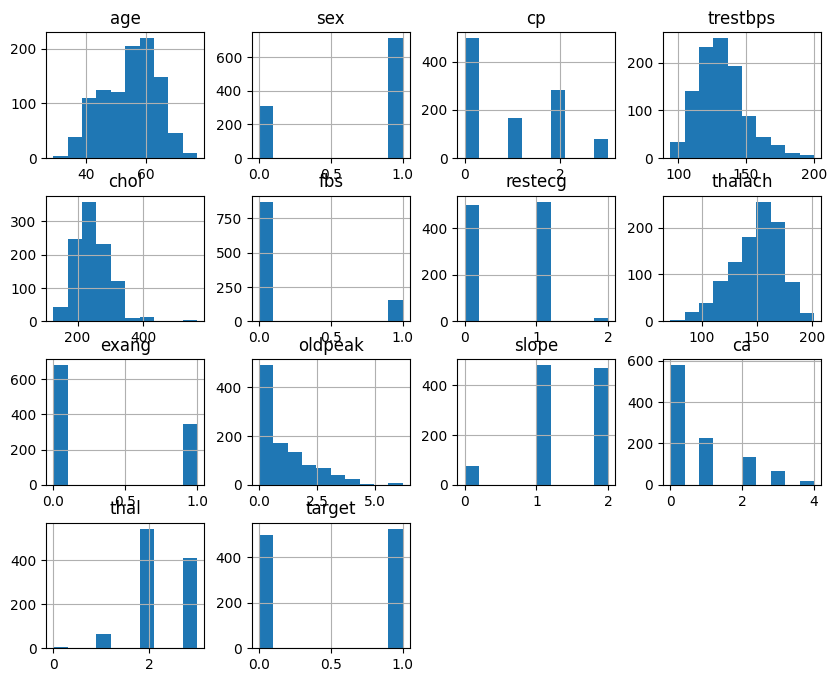

In [22]:
# Histograms
numerical_features = df.select_dtypes(include = [np.number])
num_cols = numerical_features.columns
num_cols

plt.figure(figsize=(200,170))
numerical_features.hist(figsize=(10,8))
# sns.pairplot(numerical_features)
plt.show()

# 4. Feature Engineering:


In [182]:
# done already
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_to_bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714


# 5. OUTLIER REMOVAL:

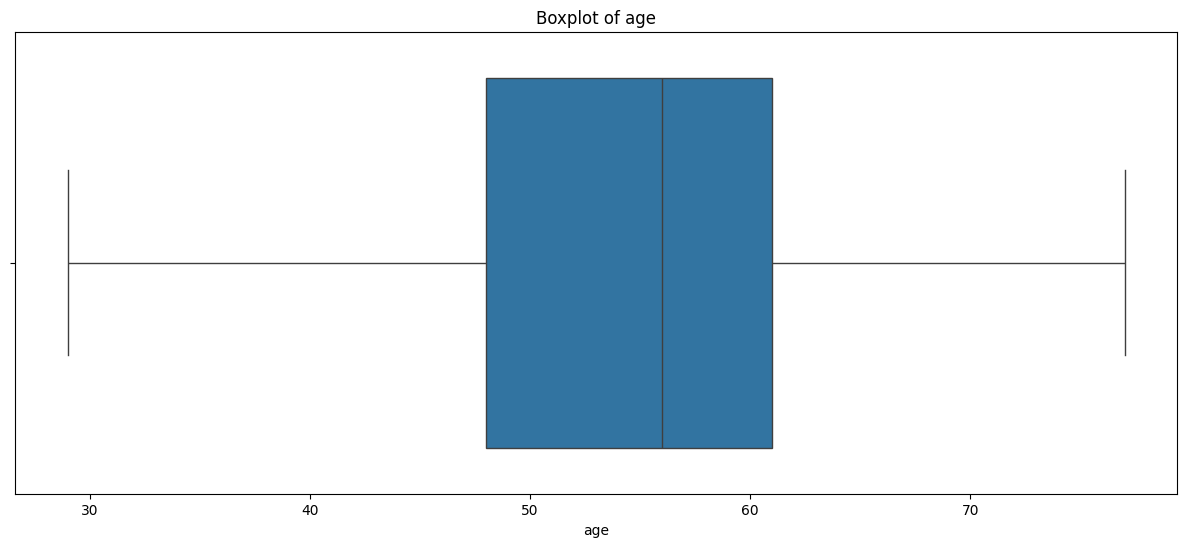

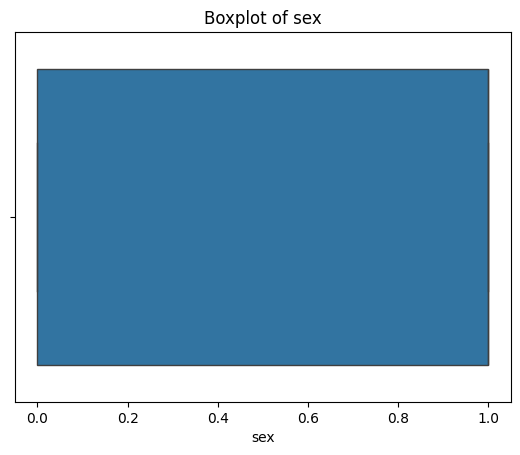

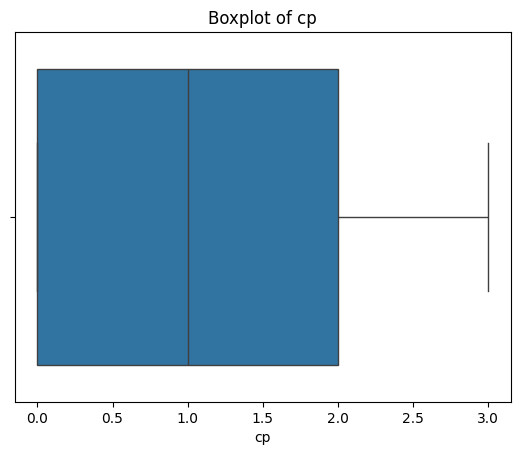

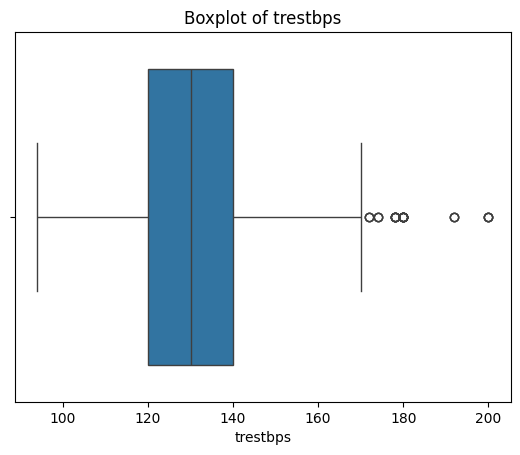

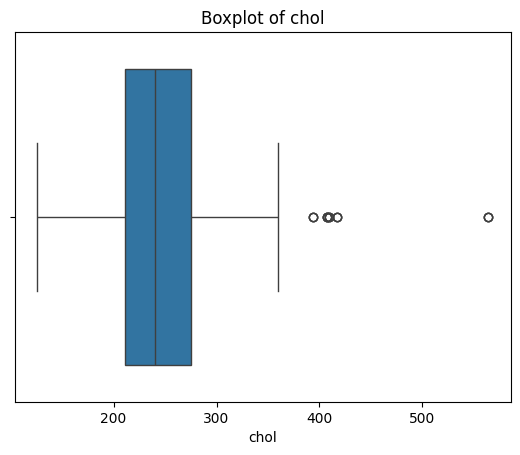

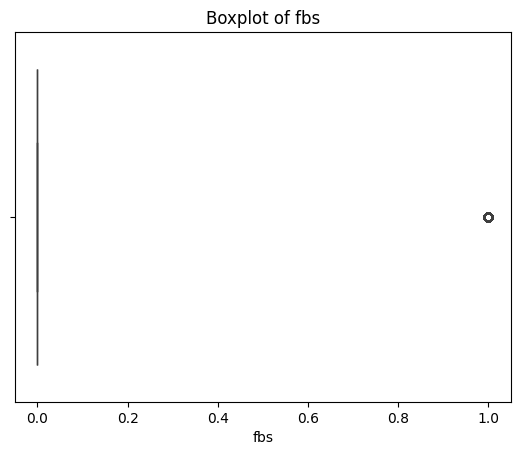

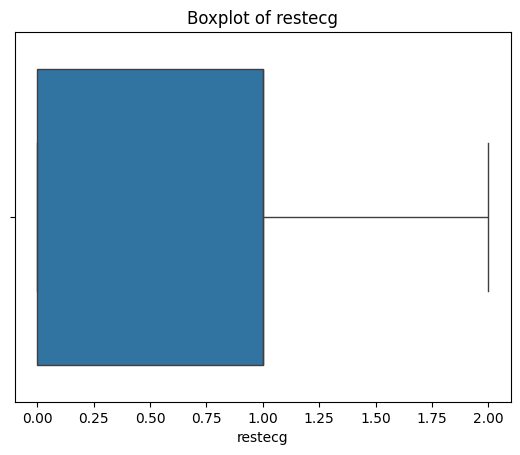

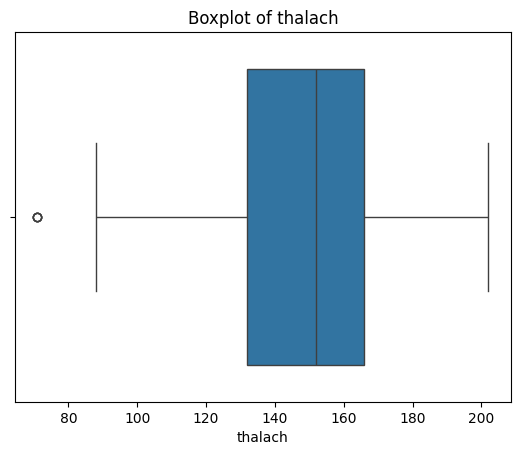

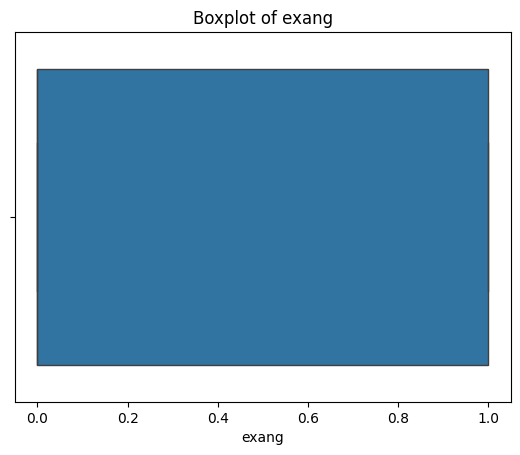

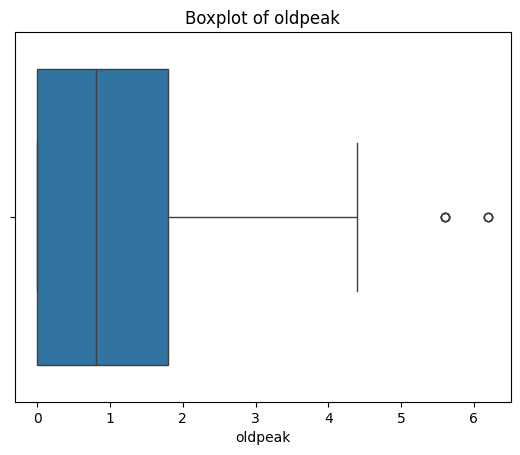

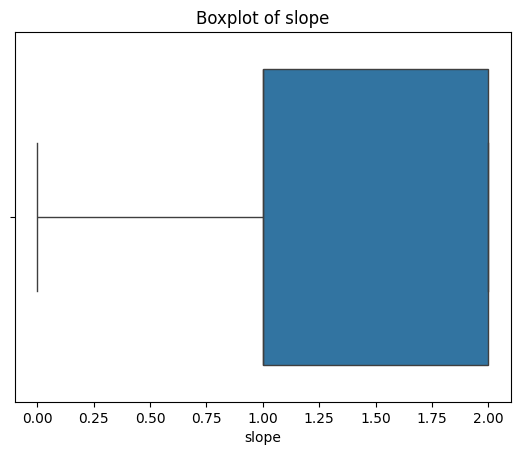

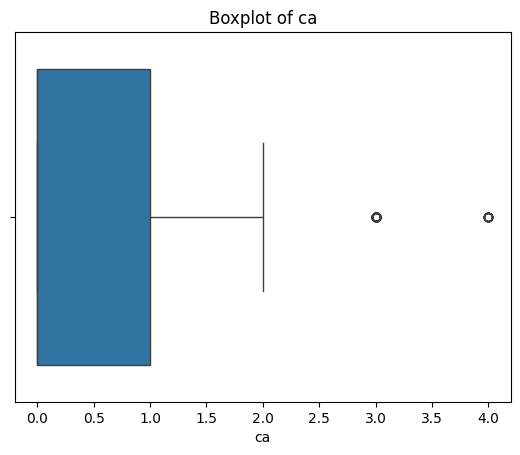

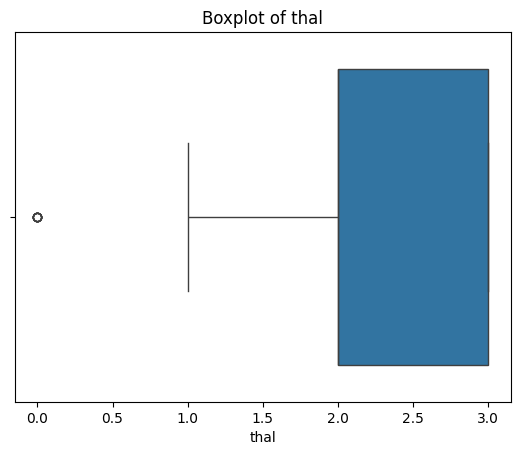

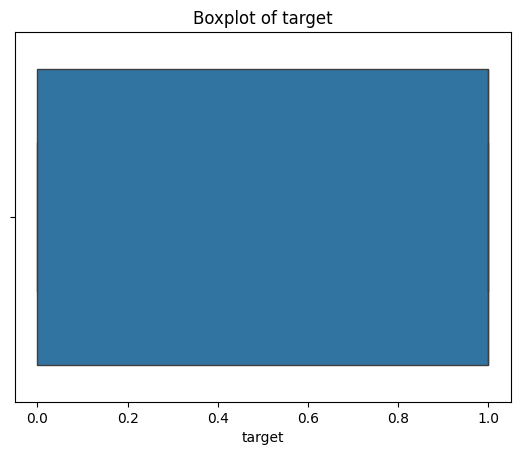

In [23]:
def show_boxplot(df, numerical_features):
    
    plt.figure(figsize=(15, 6))  
    for i, col in enumerate(numerical_features):
        # plt.subplot(1, len(numerical_features), i+1)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

show_boxplot(df, numerical_features)

In [24]:
from scipy import stats
z_scores = np.abs(stats.zscore(numerical_features))
z_scores

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.268437,0.661504,0.915755,0.377636,0.659332,0.418878,0.891255,0.821321,0.712287,0.060888,0.995433,1.209221,1.089852,1.026698
1,0.158157,0.661504,0.915755,0.479107,0.833861,2.387330,1.004049,0.255968,1.403928,1.727137,2.243675,0.731971,1.089852,1.026698
2,1.716595,0.661504,0.915755,0.764688,1.396233,0.418878,0.891255,1.048692,1.403928,1.301417,2.243675,0.731971,1.089852,1.026698
3,0.724079,0.661504,0.915755,0.936037,0.833861,0.418878,0.891255,0.516900,0.712287,0.912329,0.995433,0.238625,1.089852,1.026698
4,0.834359,1.511706,0.915755,0.364875,0.930822,2.387330,0.891255,1.874977,0.712287,0.705408,0.624121,2.179817,0.522122,1.026698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,0.484803,0.418878,0.891255,0.647366,1.403928,0.912329,0.995433,0.731971,0.522122,0.973997
1021,0.613800,0.661504,0.915755,0.377636,0.232705,0.418878,1.004049,0.352873,1.403928,1.471705,0.624121,0.238625,1.089852,1.026698
1022,0.819834,0.661504,0.915755,1.234378,0.562371,0.418878,1.004049,1.353113,1.403928,0.060888,0.624121,0.238625,0.522122,1.026698
1023,0.488996,1.511706,0.915755,1.234378,0.155137,0.418878,1.004049,0.429923,0.712287,0.912329,0.995433,0.731971,0.522122,0.973997


In [185]:
# df = df[(z_scores<3).all(axis=1)]

In [25]:
def remove_outliers(df, columns):
    """
    Removes outliers from specified columns in a DataFrame using the IQR method.
    
    Parameters:
    - df: DataFrame, The input DataFrame containing the data
    - columns: List of column names to check for outliers
    
    Returns:
    - DataFrame with outliers removed
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for the acceptable data
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

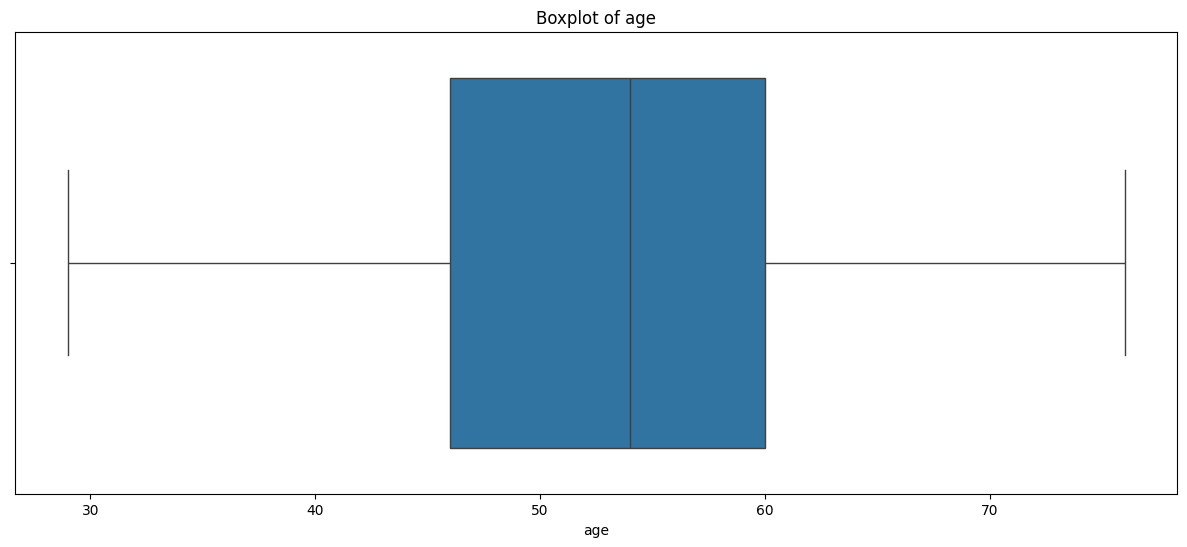

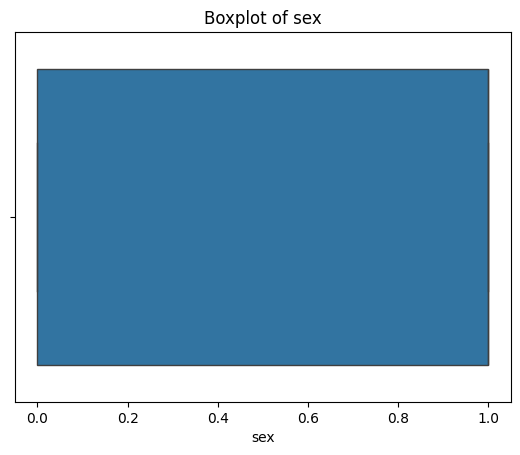

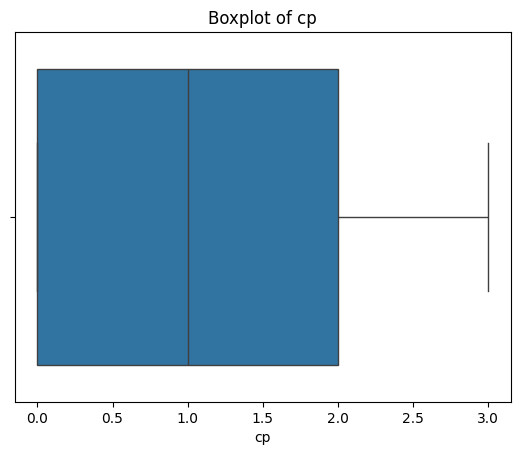

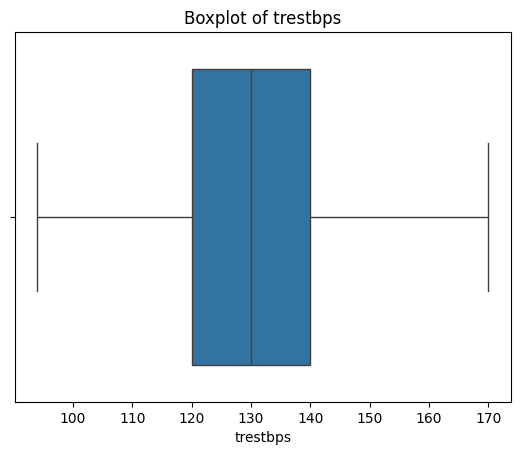

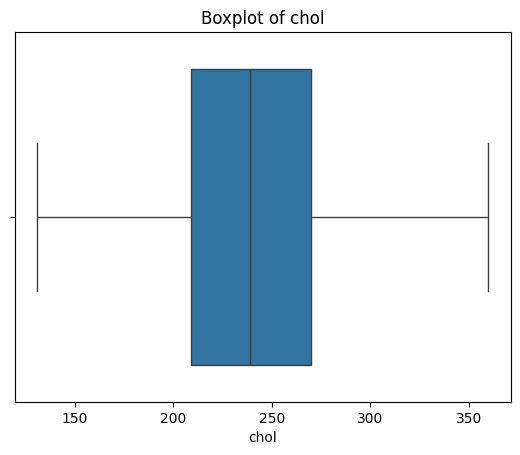

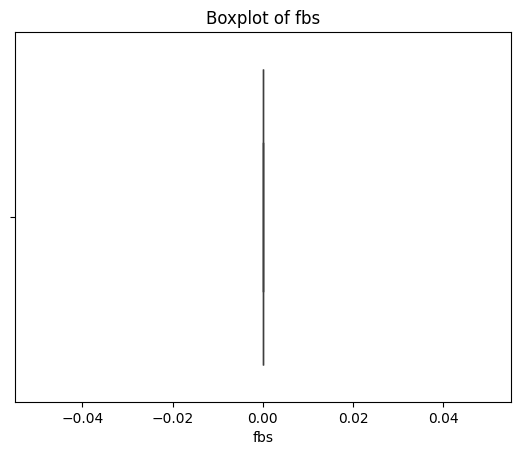

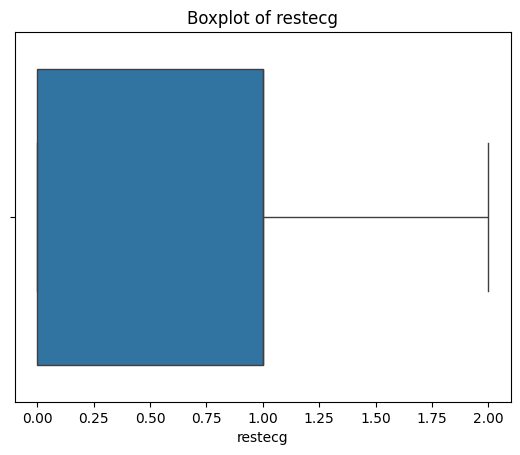

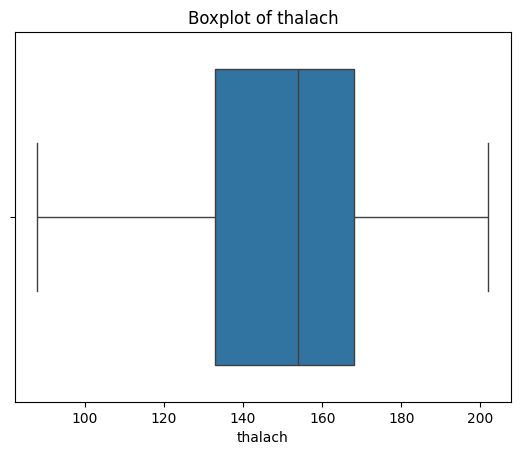

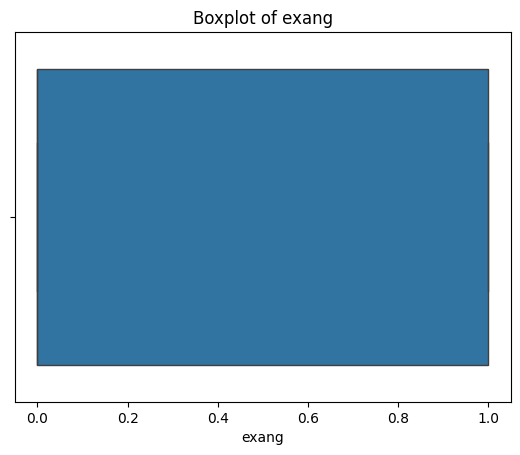

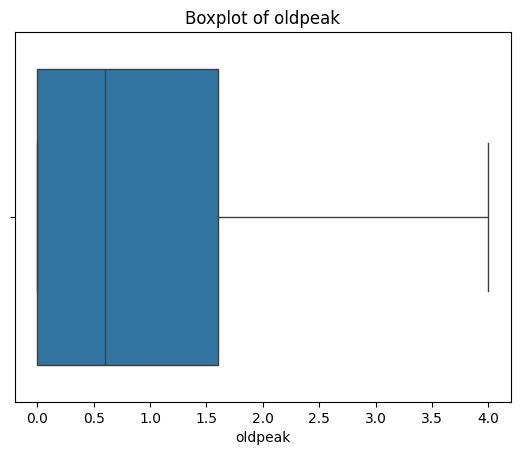

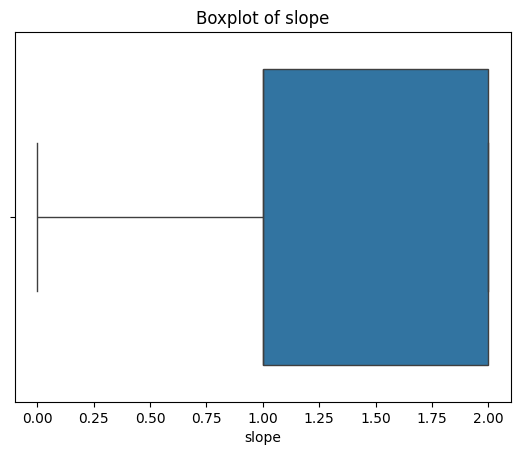

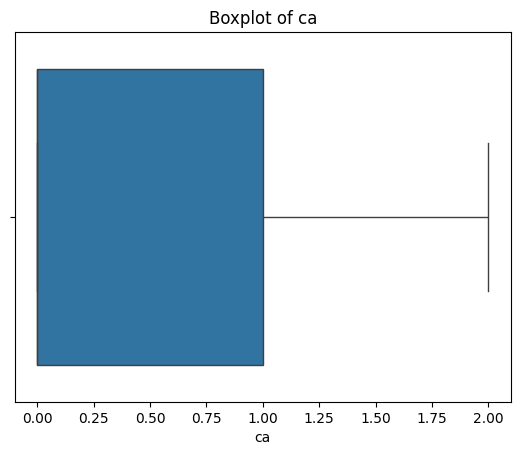

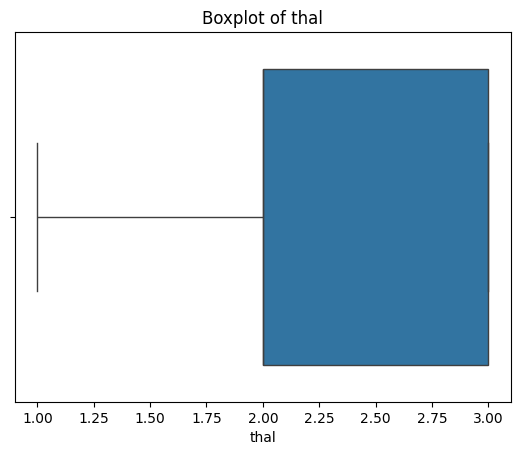

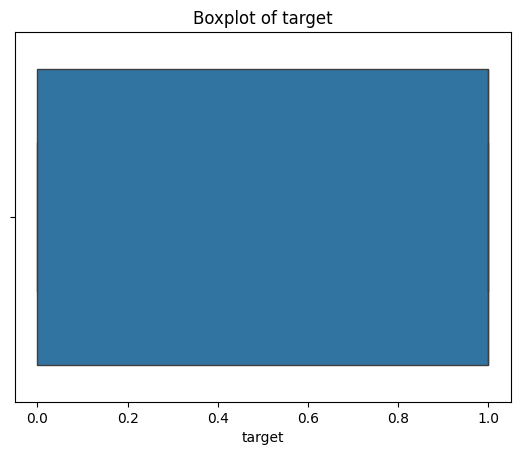

In [26]:
df_cleaned = remove_outliers(df, numerical_features)
show_boxplot(df_cleaned, numerical_features)

# 6. Frequency Distribution

In [27]:
freq  = df.value_counts()
freq_cp = df['cp'].value_counts()
freq_cp

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

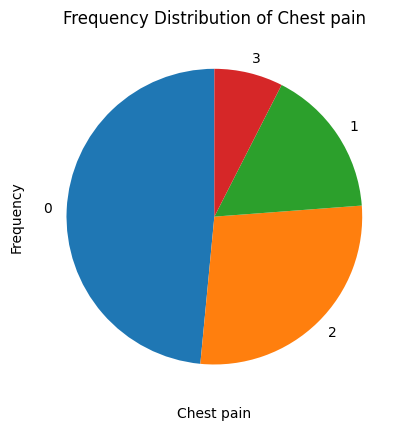

In [28]:
freq_cp.plot(kind='pie', startangle=90)
plt.title('Frequency Distribution of Chest pain')
plt.xlabel('Chest pain')
plt.ylabel('Frequency')
plt.show()

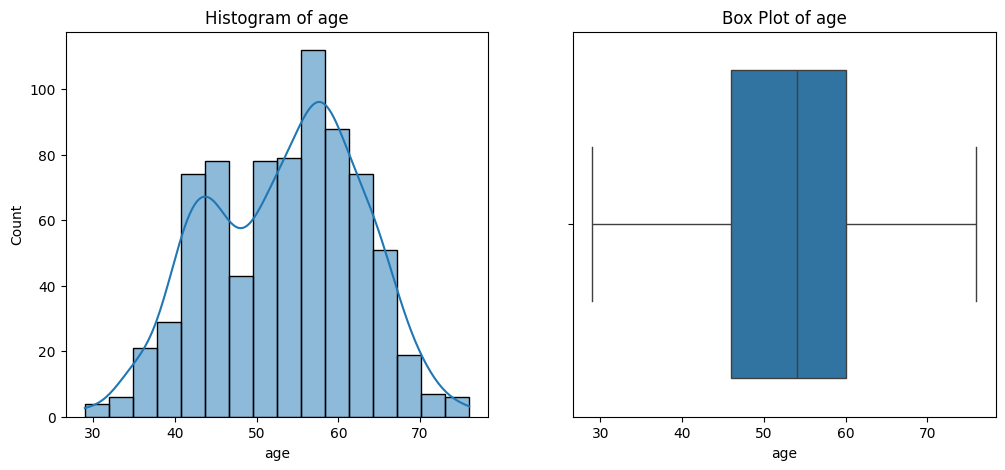

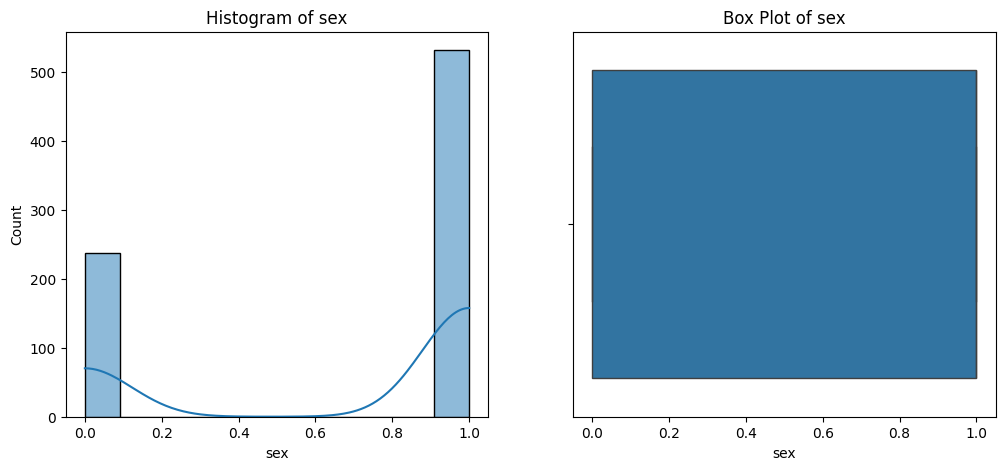

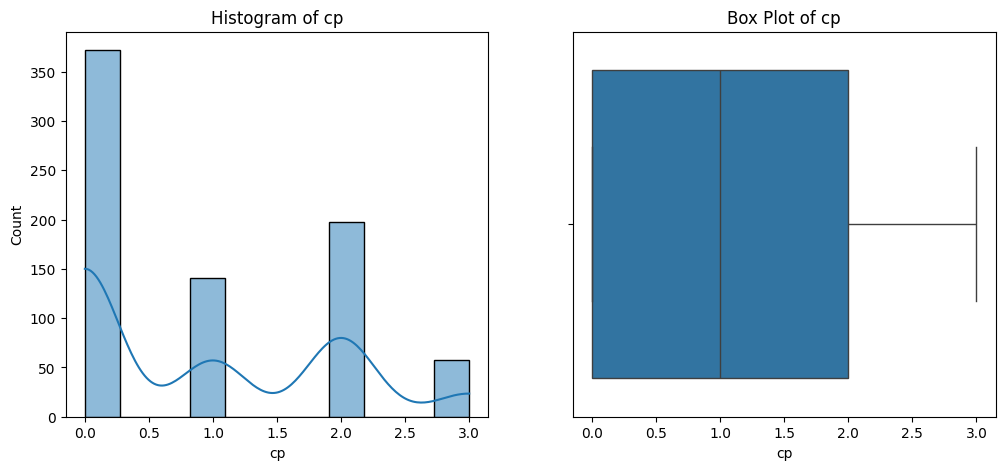

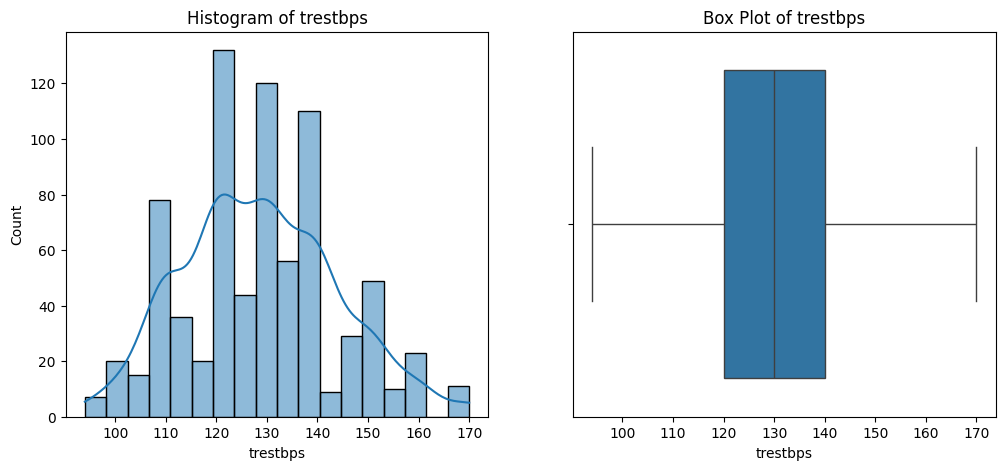

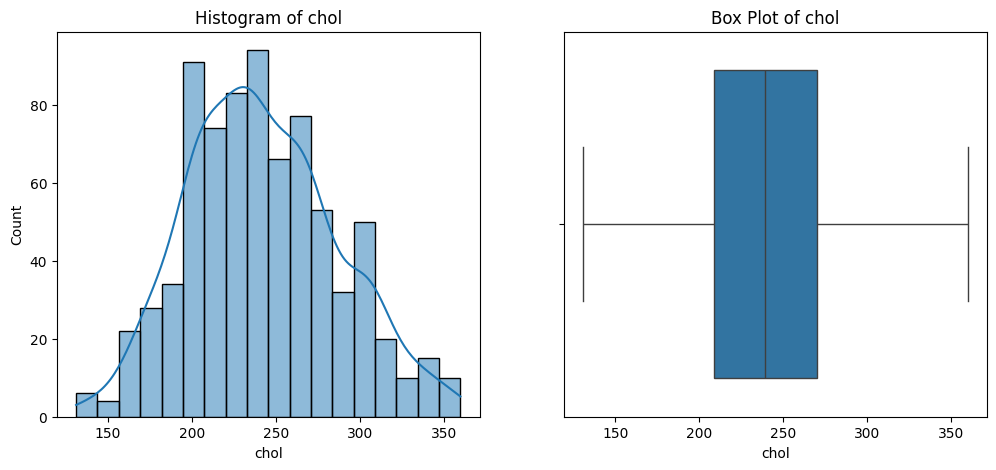

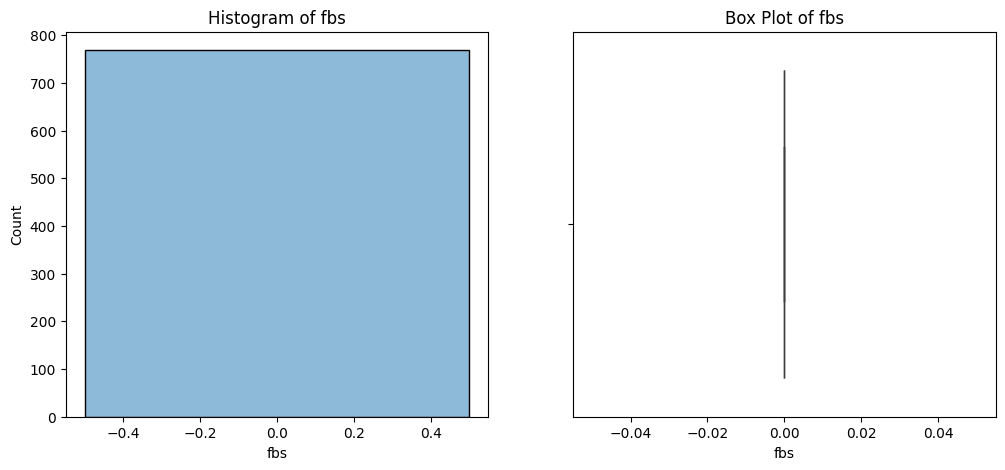

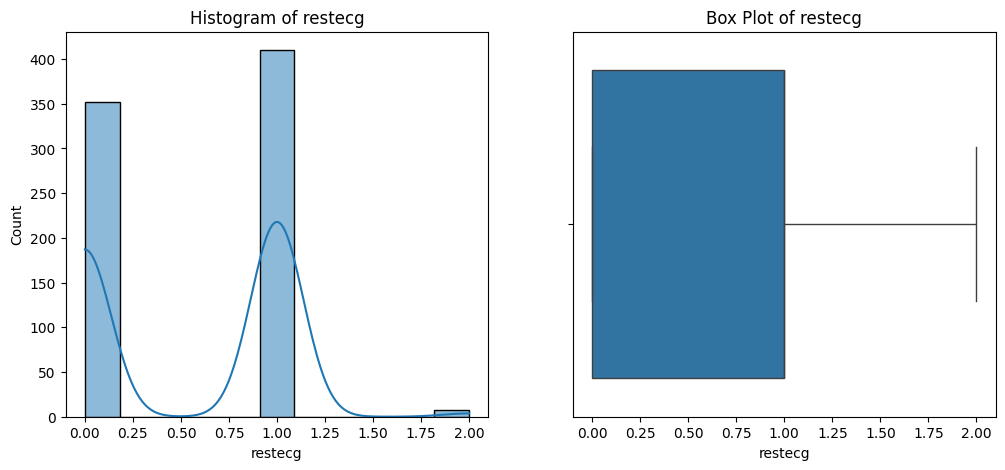

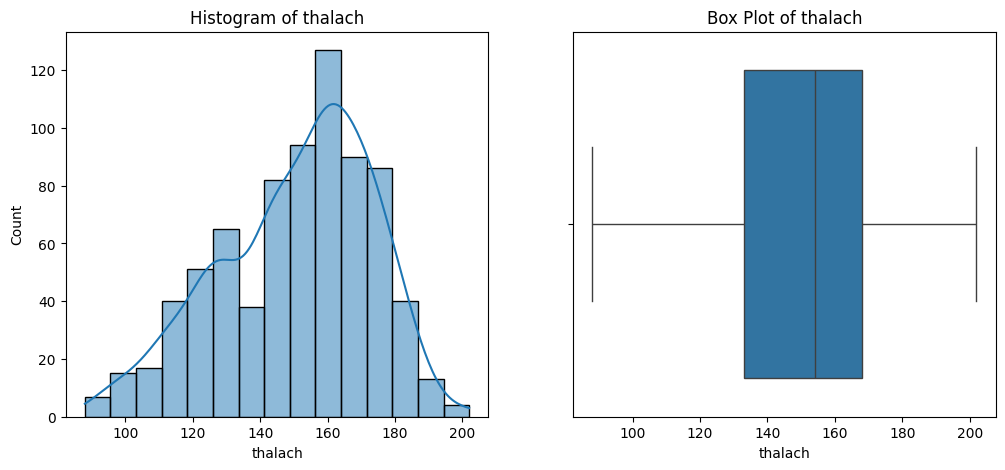

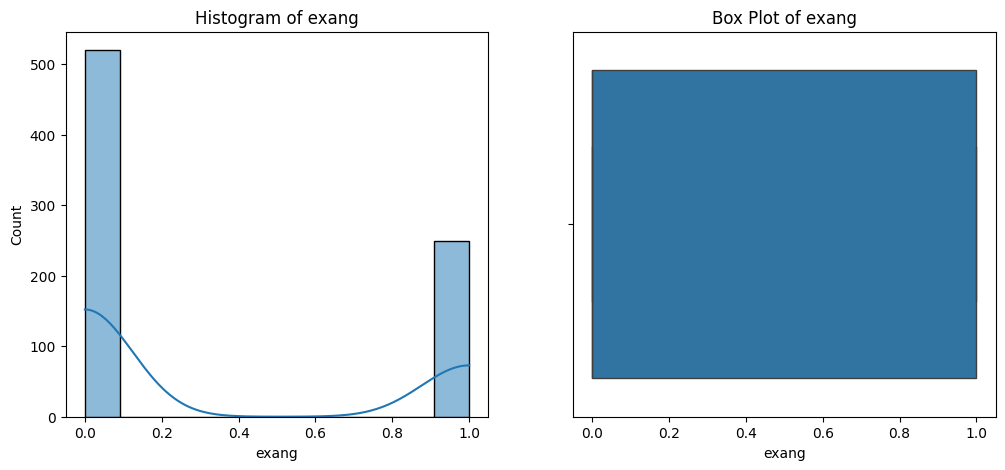

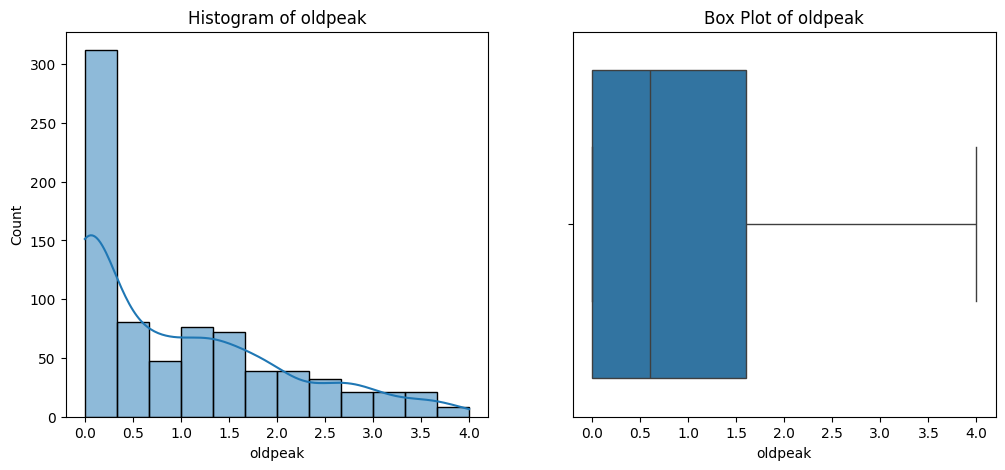

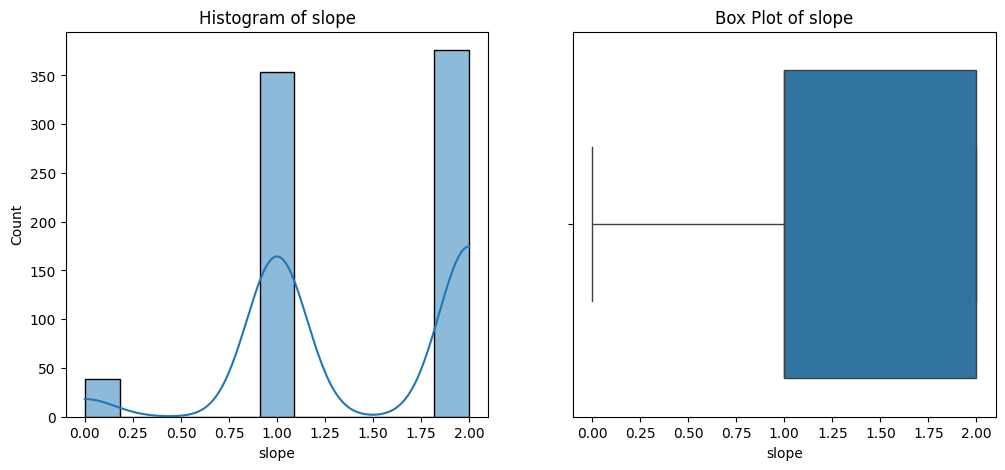

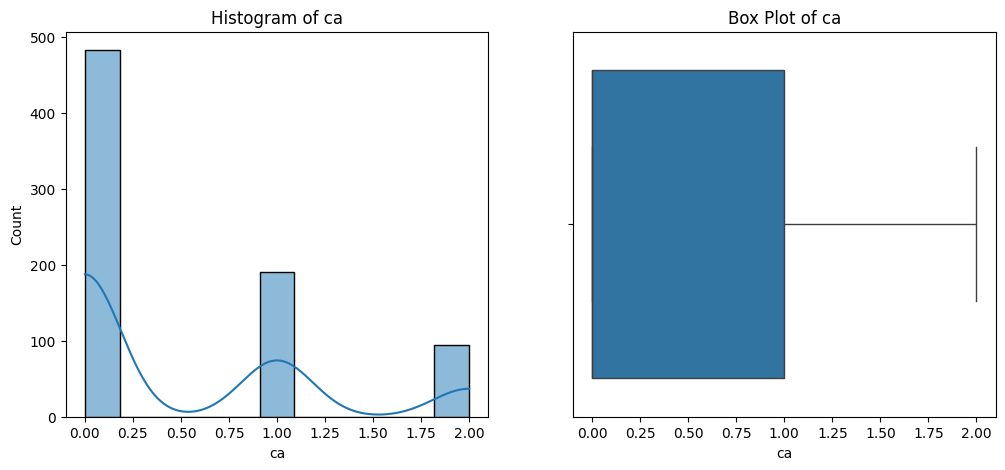

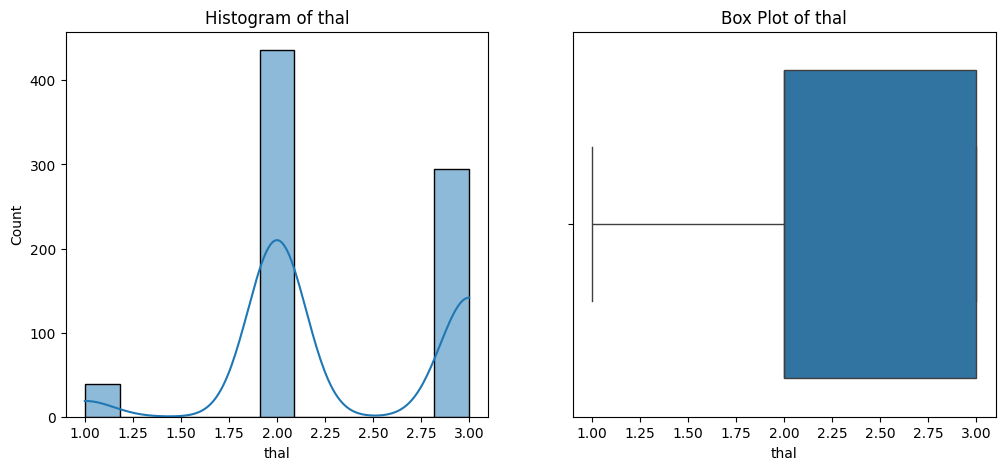

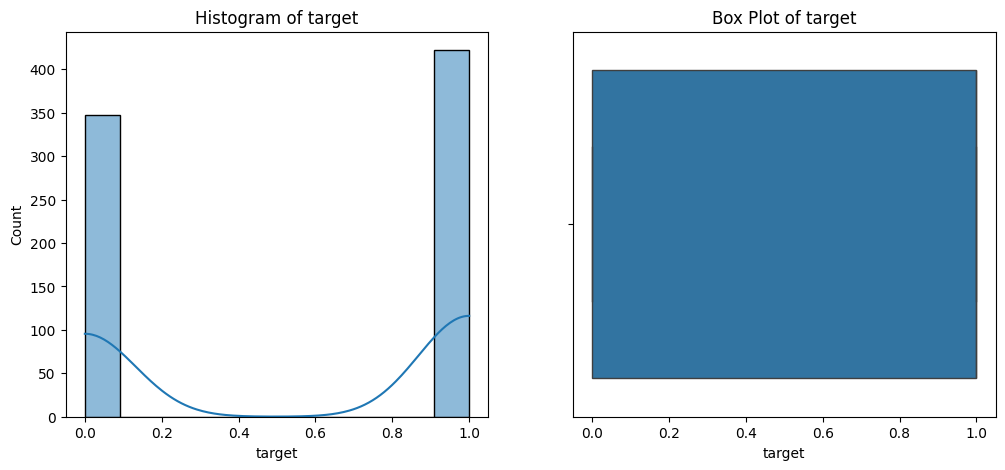

In [29]:
def plot_distributions(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        
        plt.show()

plot_distributions(df_cleaned, num_cols)

C:\Users\HARI\AppData\Local\Temp\ipykernel_12056\2214460198.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], fill=True, color='darkgreen', linewidth=2)


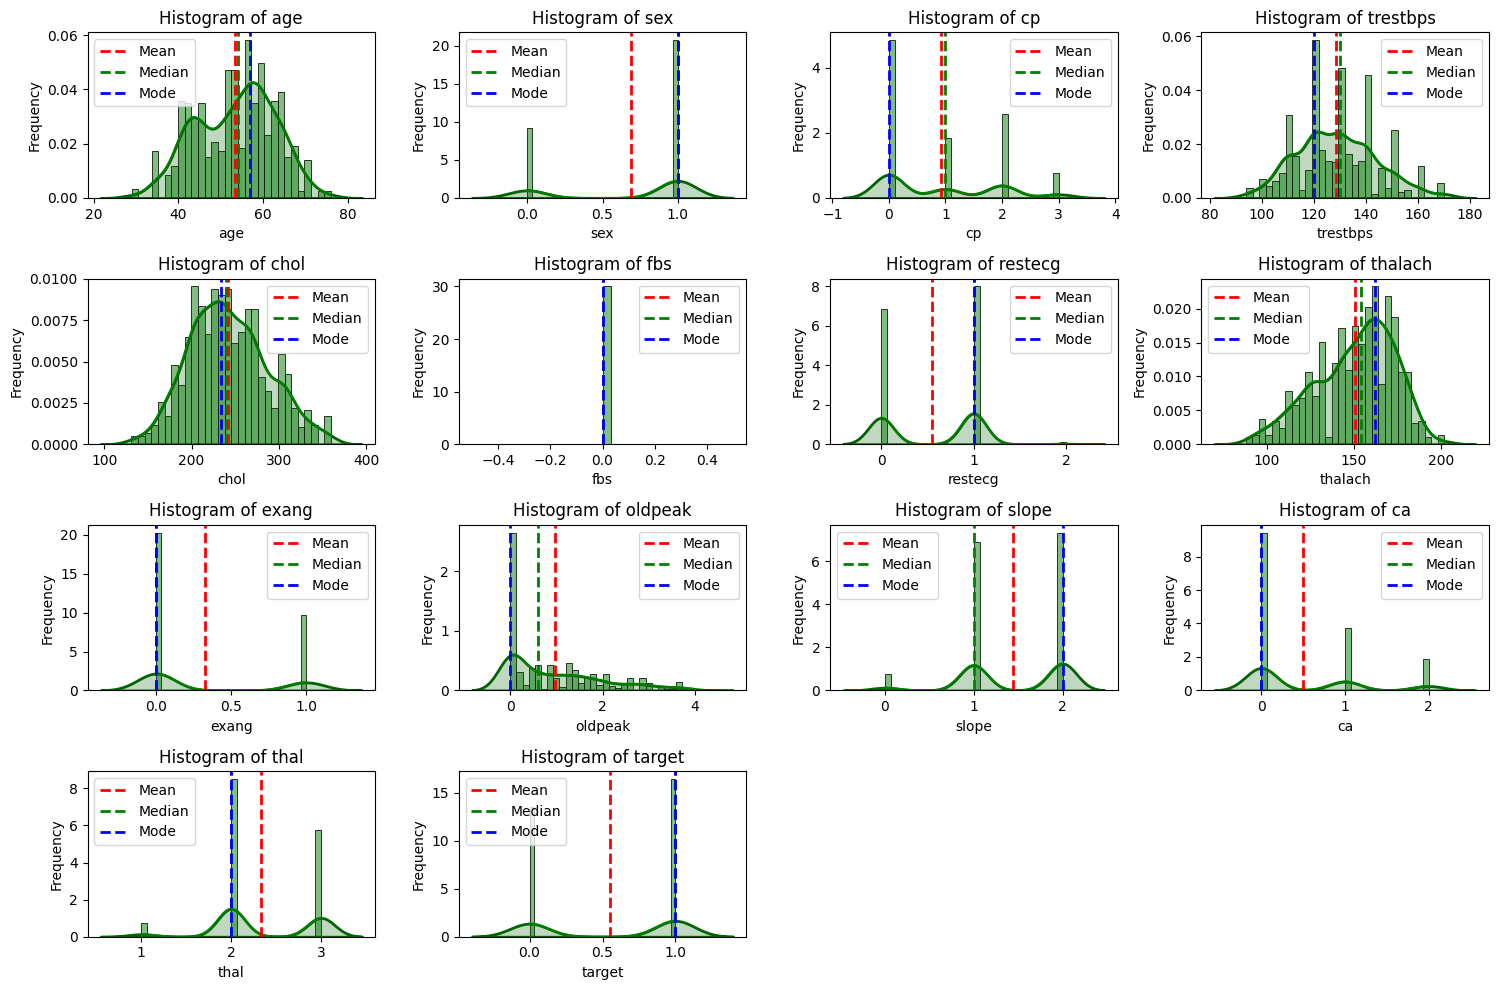

In [31]:
def show_dist(df, num_cols):
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(num_cols):
        plt.subplot(4, len(num_cols)//3, i+1)
    
        # Calculate mean, median, and mode
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0]
    
        sns.histplot(df[column], bins=30, kde=True,
                     color='green',stat='density')
    
        sns.kdeplot(df[column], fill=True, color='darkgreen', linewidth=2)
    
        plt.axvline(mean, color='red', linestyle='dashed',
                    linewidth=2, label='Mean')
        plt.axvline(median, color='green', linestyle='dashed',
                    linewidth=2, label='Median')
        plt.axvline(mode, color='blue', linestyle='dashed',
                    linewidth=2, label='Mode')
    
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

show_dist(df_cleaned, num_cols)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


<Figure size 4500x3000 with 0 Axes>

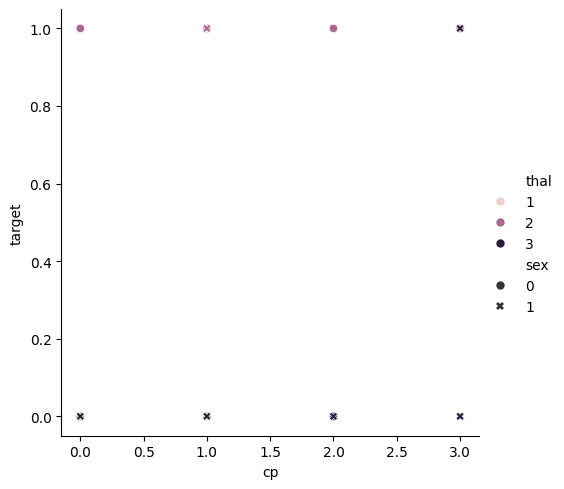

In [35]:
def scatter_plt(df):
    plt.figure(figsize=(45,30))

    sns.relplot(kind='scatter', x='cp', y='target',hue = 'thal', style='sex',   data=df)

    # plt.legend()
    plt.show()
print (num_cols)
scatter_plt(df_cleaned)

# 7.Normalization

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


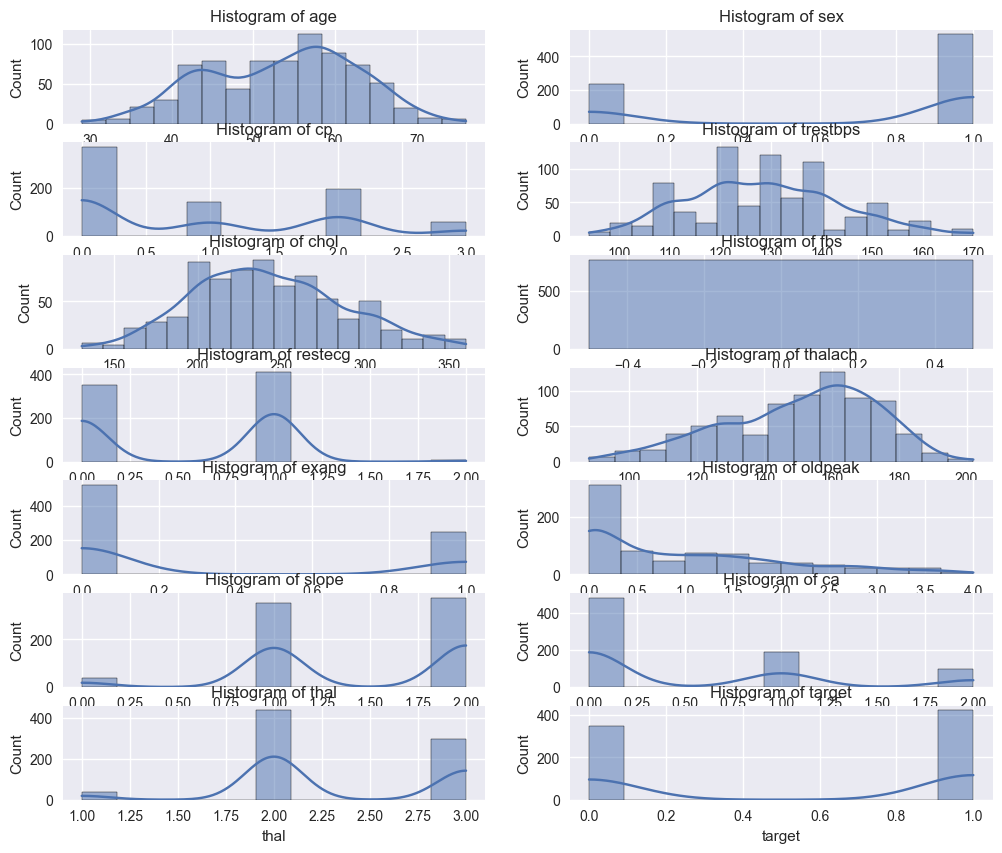

In [37]:
plt.figure(figsize=(12, 10))
print(plt.style.available)

plt.style.use('seaborn-v0_8')
for i, col in enumerate(num_cols):
    plt.subplot(7,2,i+1)
    sns.histplot(kde=True, data = df_cleaned, x=col)
    plt.title(f'Histogram of {col}')
plt.show()

## Standard Feature Scaling

In [38]:
numerical_features.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

df_cleaned_num = df_cleaned.select_dtypes(include=np.number)
num_1 = df_cleaned_num.copy()

scaler = StandardScaler()
for col in num_1.columns:
    lower_limit = num_1[col].quantile(0.01)
    upper_limit = num_1[col].quantile(0.99)
    num_1[col] = np.clip(num_1[col],lower_limit, upper_limit) 

normalized_data = scaler.fit_transform(num_1)
numerical_data_normalized = pd.DataFrame(normalized_data, columns=num_cols)

numerical_data_normalized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.156940,0.667449,-0.907835,-0.246201,-0.682308,0.0,0.918763,0.778009,-0.691987,0.028788,0.952814,2.134054,1.175946,-1.102787
1,1.823335,0.667449,-0.907835,1.070410,-1.542390,0.0,0.918763,-1.148631,1.445114,1.562928,-2.439380,-0.702744,1.175946,-1.102787
2,0.833197,0.667449,-0.907835,1.267902,-0.886012,0.0,0.918763,0.464370,-0.691987,-0.930050,0.952814,0.715655,1.175946,-1.102787
3,0.503152,-1.498241,-0.907835,-1.891966,0.132506,0.0,-1.088420,-1.283047,-0.691987,0.028788,-0.743283,-0.702744,-0.583397,0.906794
4,0.173106,0.667449,-0.907835,2.057869,1.060489,0.0,-1.088420,-0.252519,1.445114,-0.162980,-0.743283,0.715655,1.175946,-1.102787


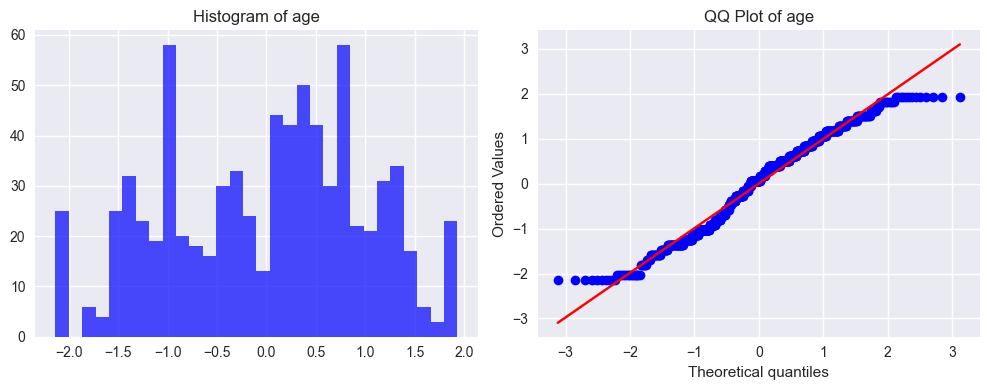

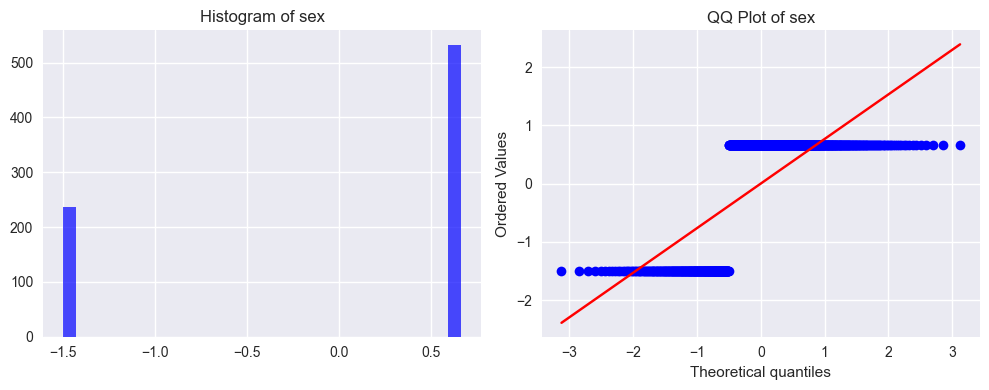

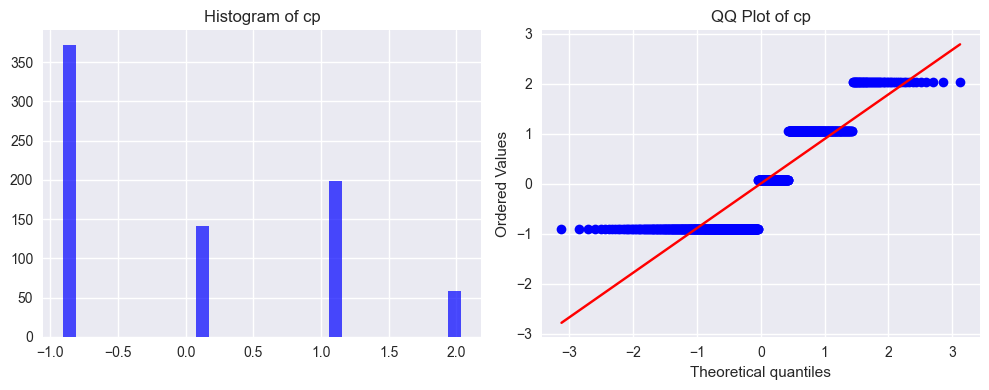

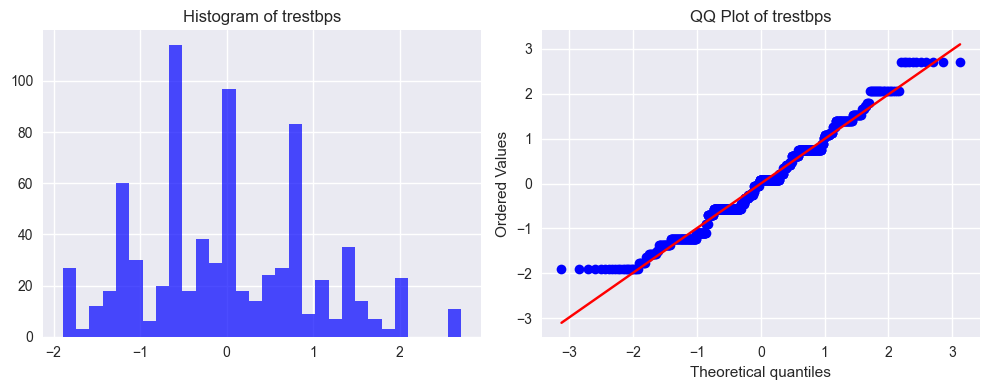

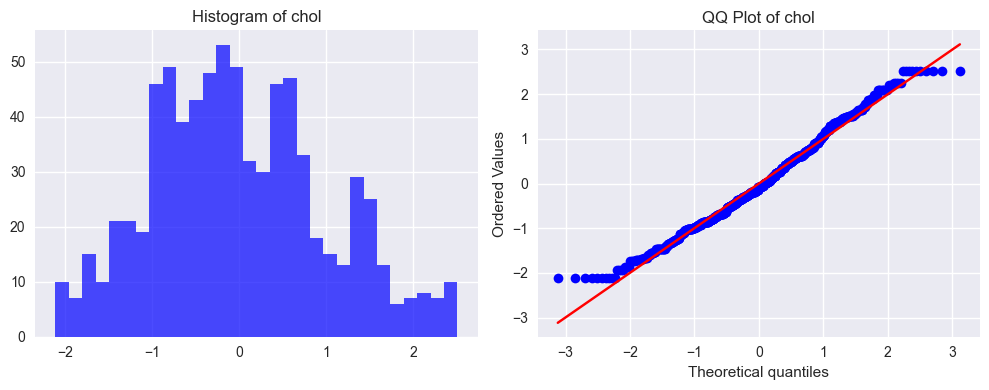

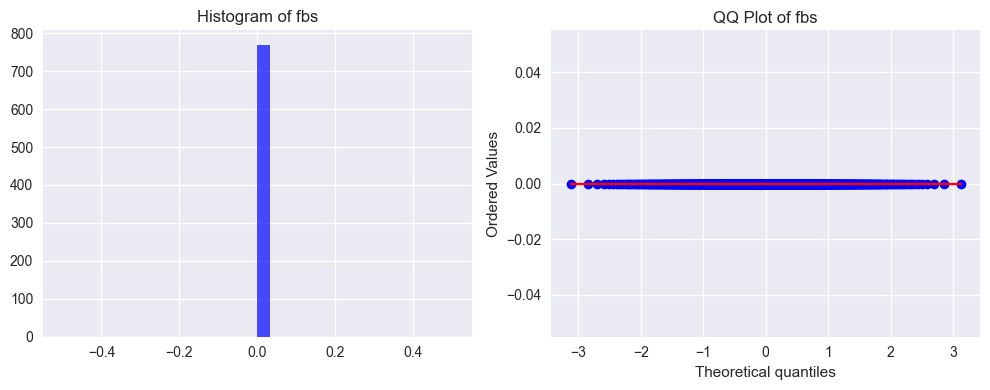

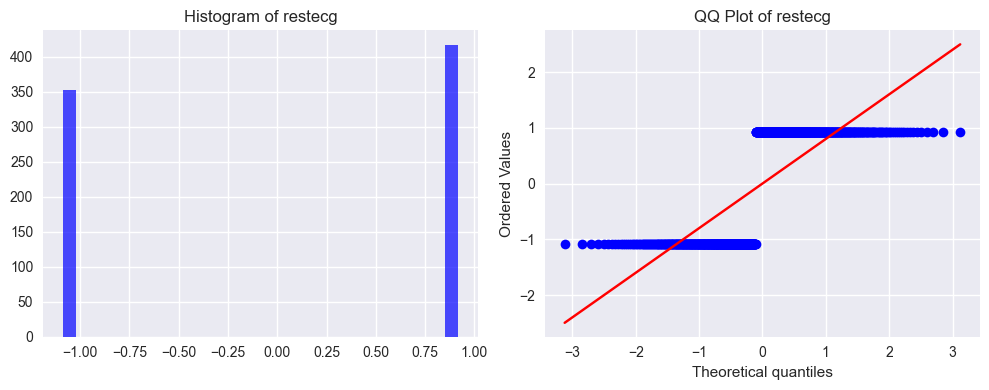

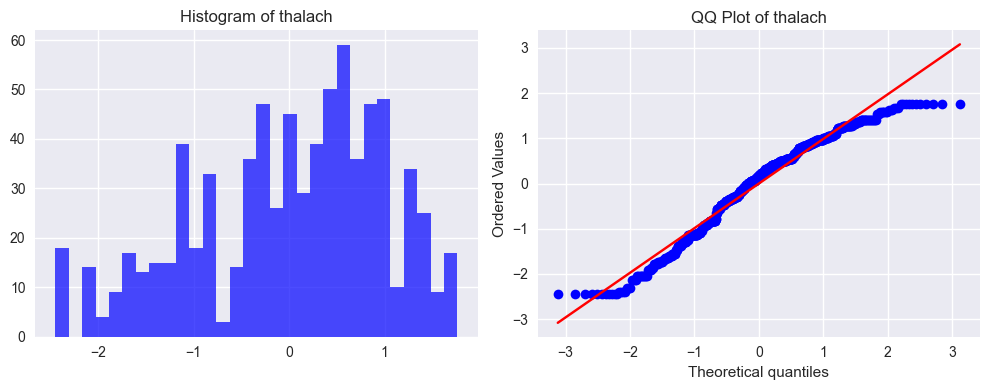

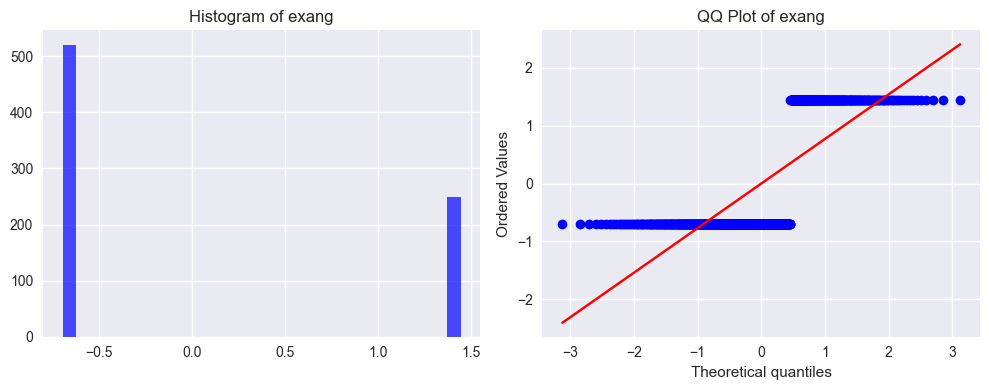

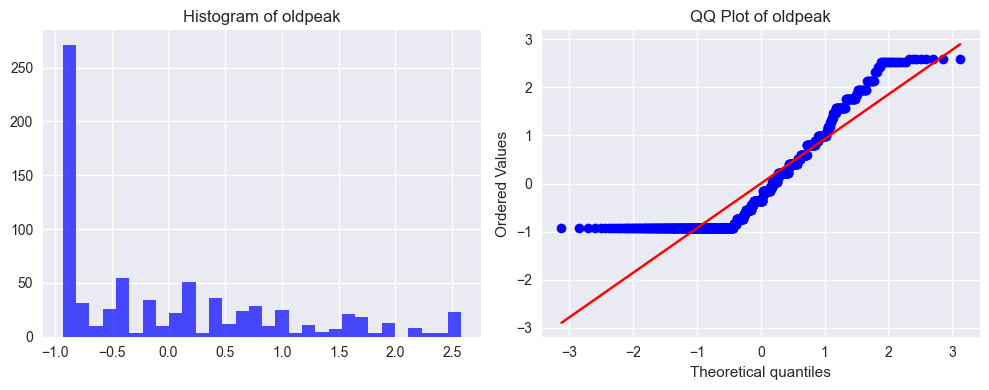

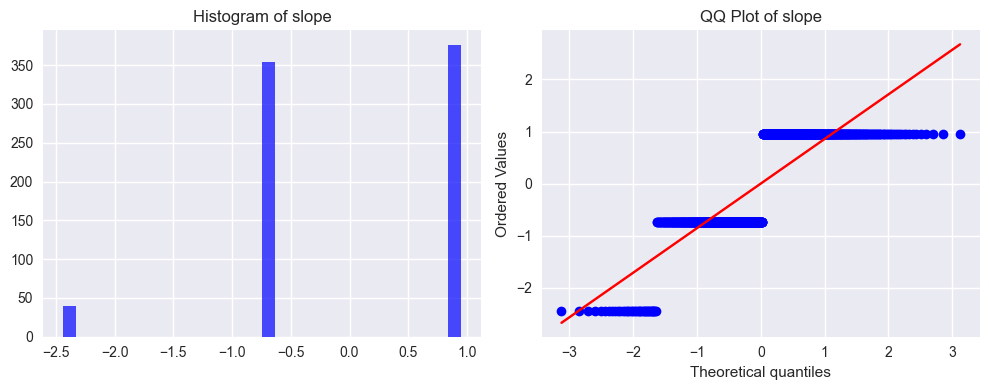

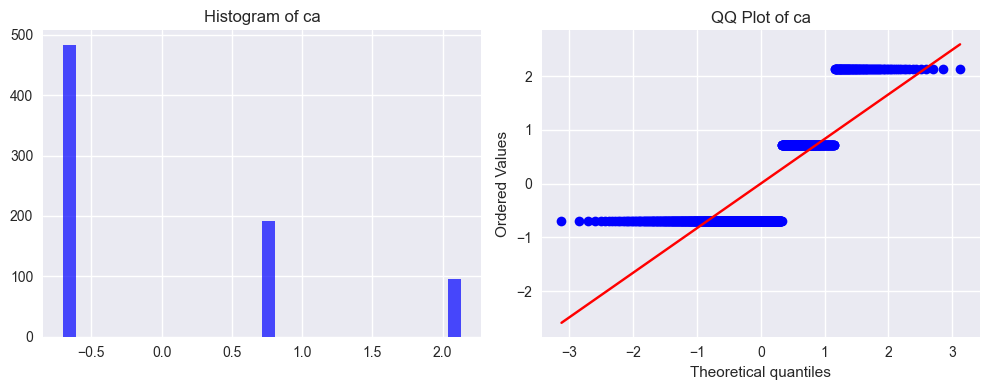

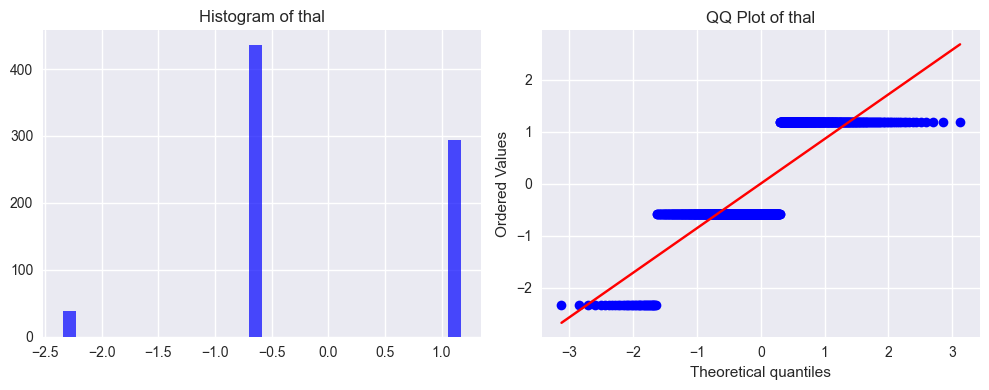

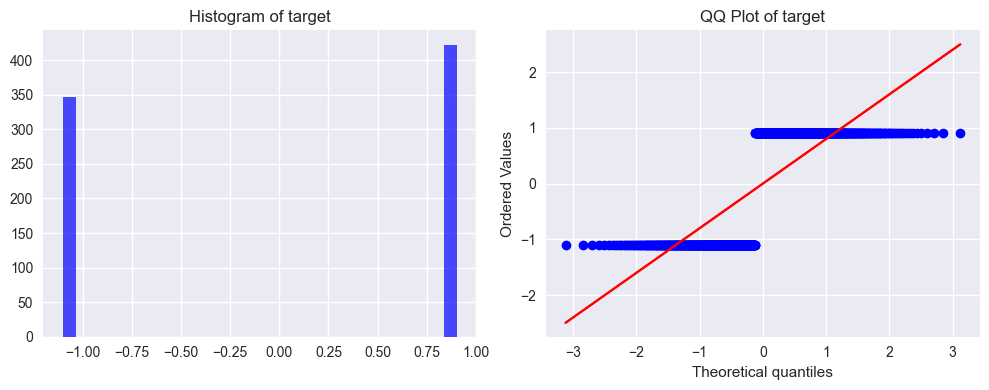

In [40]:
#QQ and histogram plots

import matplotlib.pyplot as plt
import scipy.stats as stats

for col in numerical_data_normalized.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(numerical_data_normalized[col], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    stats.probplot(numerical_data_normalized[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    
    plt.tight_layout()
    plt.show()


In [41]:
from scipy.stats import shapiro, kstest

for col in numerical_data_normalized.columns:
    print(f"Normality test results for {col}:")
    
    shapiro_test = shapiro(numerical_data_normalized[col])
    print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
    
    ks_test = kstest(numerical_data_normalized[col], 'norm')
    print(f"Kolmogorov-Smirnov test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")
    
    print("\n")

Normality test results for age:
Shapiro-Wilk test: Statistic=0.9751171336654371, p-value=3.666190484809455e-10
Kolmogorov-Smirnov test: Statistic=0.09112210888525685, p-value=5.245741979798705e-06


Normality test results for sex:
Shapiro-Wilk test: Statistic=0.5807080561182903, p-value=2.2259194172146225e-39
Kolmogorov-Smirnov test: Statistic=0.4395649869068743, p-value=8.812873645455339e-136


Normality test results for cp:
Shapiro-Wilk test: Statistic=0.7880965012146217, p-value=1.9635502092054932e-30
Kolmogorov-Smirnov test: Statistic=0.301762420122055, p-value=1.2929520576722222e-62


Normality test results for trestbps:
Shapiro-Wilk test: Statistic=0.9775101813954454, p-value=1.6995750891038926e-09
Kolmogorov-Smirnov test: Statistic=0.09458720404270143, p-value=1.9383806493586053e-06


Normality test results for chol:
Shapiro-Wilk test: Statistic=0.9872657097786522, p-value=3.123235150920901e-06
Kolmogorov-Smirnov test: Statistic=0.0507626067537984, p-value=0.036698055178511324



C:\Users\HARI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
from scipy.stats import boxcox

num_1['Value_log'] = np.log1p(num_1['chol'])

num_1['Age_boxcox'], _ = boxcox(num_1['thalach'] + 0.01)

transformed_data = num_1[['Value_log', 'Age_boxcox']]
normalized_transformed_data = scaler.fit_transform(transformed_data)
transformed_data_normalized = pd.DataFrame(normalized_transformed_data, columns=['Value_log', 'Age_boxcox'])

transformed_data_normalized.head()
num_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Value_log,Age_boxcox
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,5.361292,82921.946163
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,5.164786,41035.910126
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,5.318120,74936.069752
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,5.517453,38731.277468
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,5.669881,58415.877809


Index(['Value_log', 'Age_boxcox'], dtype='object')


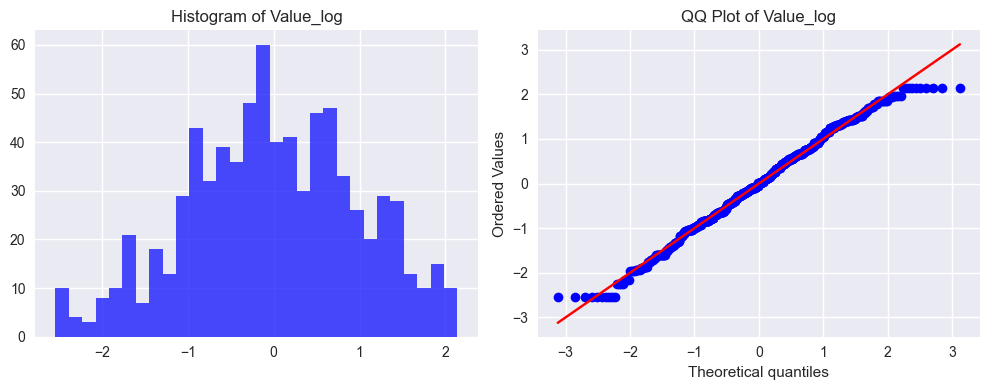

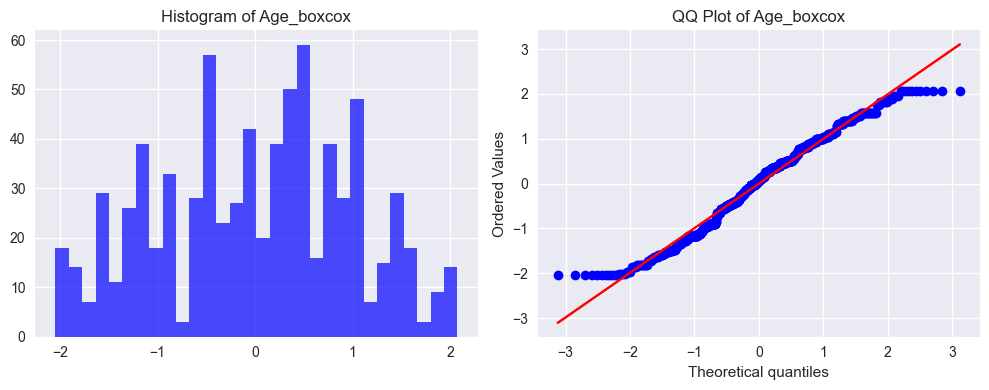

In [45]:
#QQ and histogram plots
print(transformed_data_normalized.columns)

import matplotlib.pyplot as plt
import scipy.stats as stats

for col in transformed_data_normalized.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(transformed_data_normalized[col], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    stats.probplot(transformed_data_normalized[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    
    plt.tight_layout()
    plt.show()


In [46]:
from scipy.stats import shapiro, kstest

for col in transformed_data_normalized.columns:
    print(f"Normality test results for {col}:")
    
    shapiro_test = shapiro(transformed_data_normalized[col])
    print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
    
    ks_test = kstest(transformed_data_normalized[col], 'norm')
    print(f"Kolmogorov-Smirnov test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")
    
    print("\n")

Normality test results for Value_log:
Shapiro-Wilk test: Statistic=0.9923905161688884, p-value=0.0005637463623173206
Kolmogorov-Smirnov test: Statistic=0.028607810590452698, p-value=0.5453670733487554


Normality test results for Age_boxcox:
Shapiro-Wilk test: Statistic=0.981466293144826, p-value=2.706975377965807e-08
Kolmogorov-Smirnov test: Statistic=0.06599298329574013, p-value=0.00234947572129545




### 2.Z-score Normalization  (standardization)

In [47]:
# 2) Z-score Normalization
def zscore_normalize(data):
    return (data - data.mean()) / data.std()

# Apply normalization to each column
df_normalized_2 = num_1.apply(zscore_normalize)

print("Z-score Normalized Data:\n")
df_normalized_2

Z-score Normalized Data:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Value_log,Age_boxcox
0,-0.156838,0.667015,-0.907245,-0.246041,-0.681865,NaN,0.918165,0.777503,-0.691537,0.028769,0.952194,2.132666,1.175181,-1.102069,-0.631282,0.769385
2,1.822149,0.667015,-0.907245,1.069714,-1.541387,NaN,0.918165,-1.147884,1.444174,1.561912,-2.437794,-0.702287,1.175181,-1.102069,-1.703071,-1.162880
3,0.832656,0.667015,-0.907245,1.267077,-0.885436,NaN,0.918165,0.464068,-0.691537,-0.929446,0.952194,0.715190,1.175181,-1.102069,-0.866752,0.400985
5,0.502824,-1.497266,-0.907245,-1.890735,0.132420,NaN,-1.087713,-1.282213,-0.691537,0.028769,-0.742800,-0.702287,-0.583018,0.906204,0.220454,-1.269196
7,0.172993,0.667015,-0.907245,2.056530,1.059799,NaN,-1.087713,-0.252355,1.444174,-0.162874,-0.742800,0.715190,1.175181,-1.102069,1.051831,-0.361116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.612768,0.667015,0.074009,0.740775,-0.478293,NaN,0.918165,0.598397,1.444174,-0.929446,0.952194,-0.702287,-0.583018,0.906204,-0.405557,0.556224
1021,0.722712,0.667015,-0.907245,-0.246041,0.358610,NaN,-1.087713,-0.431461,1.444174,1.753555,-0.742800,0.715190,1.175181,-1.102069,0.435215,-0.534642
1022,-0.706556,0.667015,-0.907245,-1.232857,0.743133,NaN,-1.087713,-1.461319,1.444174,0.028769,-0.742800,0.715190,-0.583018,-1.102069,0.781956,-1.405441
1023,-0.376725,-1.497266,-0.907245,-1.232857,0.268134,NaN,-1.087713,0.374515,-0.691537,-0.929446,0.952194,-0.702287,-0.583018,0.906204,0.350323,0.299682


In [48]:
#FLATTEN DATA:

df_flatten = df_normalized_2.to_numpy().flatten()
df_flatten


array([-0.15683776,  0.6670153 , -0.90724453, ..., -1.10206936,
       -1.28330778, -1.56700324])

## inference:

- As p value is less than 0.05 it is not normalized.
- Also from QQ plot and Histograms - not normalized.

# 9. Linear regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

### Linear regression

In [86]:
# Assuming 'scaled_df' is your features DataFrame (X) and 'target' is the series for the target variable (y)
df_x = df.drop(columns = ['cp', 'thalach'])
print(num_cols)
df_x = df[['cp', 'thalach']]  # Ensure df_x is a 2D DataFrame

target = df['target']
X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                    target, 
                                                    test_size=0.2,  # 20% for testing, 80% for training
                                                    random_state=42)  # For reproducibility

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
X_train shape: (820, 2)
y_train shape: (820,)


In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercepts
print("Coefficients:", model.coef_)
print()
print("Intercept:", model.intercept_)

Coefficients: [0.15767825 0.00732769]

Intercept: -0.7287252123865977


In [88]:
# Use the built model to make predictions
y_pred = model.predict(X_test)

In [89]:
# Accuracy of the model
model.score(X_test,y_test)

0.25020329658196927

In [90]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 0.1874447154339043
RMSE: 0.43294886006768085
MAE: 0.3738814537105004
R-squared: 0.25020329658196927


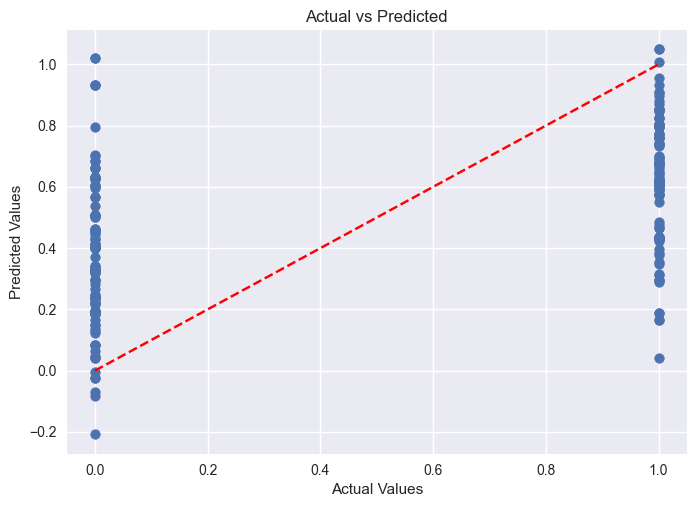

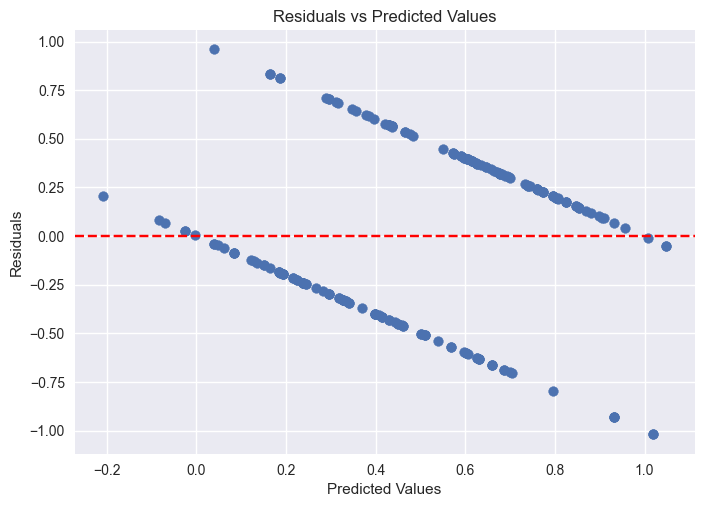

In [91]:
# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')#red)
plt.show()
print()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values');
plt.show()

In [92]:
#Can use lasso and ridge to improve performace

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['age', 'chol', 'trestbps', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'chol', 'trestbps', 'thalach', 'oldpeak']])


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['chol', 'trestbps', 'thalach', 'oldpeak', 'sex', 'cp']]  # Add or remove features as needed
y = df['age']  # Target variable (e.g., age)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)  # Drop the first column for categorical variables to avoid multicollinearity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy of the model
acc = model.score(X_test,y_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print (f"Accuracy : {acc * 100}%")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Accuracy : 20.286676830503826%
Mean Squared Error: 60.04104238294367
Root Mean Squared Error: 7.748615513944648
R-squared: 0.20286676830503825


C:\Users\HARI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Model Coefficients:
chol: 0.033905604379098724
trestbps: 0.12325107498172069
thalach: -0.15025992759960147
oldpeak: 0.3531808797565481
sex: -1.050268942881276
cp: 0.4172934891350666


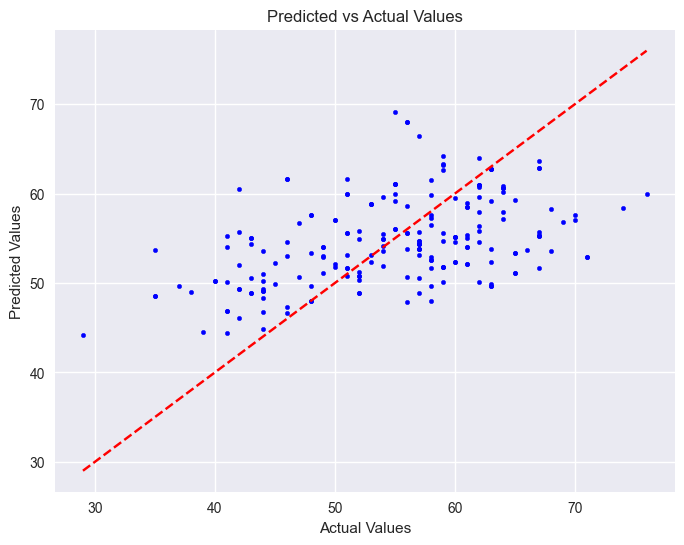

In [108]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line where predicted = actual
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

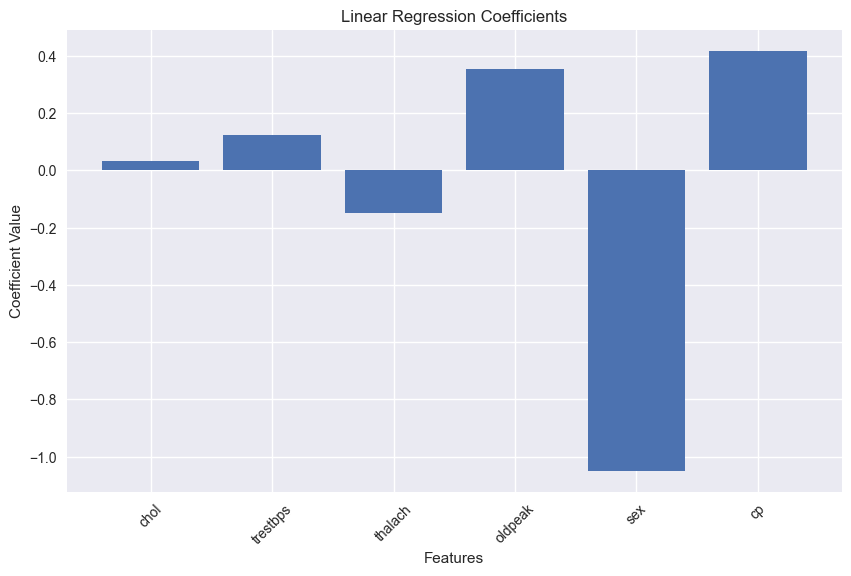

In [109]:
# Create a bar plot to visualize the model's coefficients
coefficients = model.coef_

plt.figure(figsize=(10, 6))
plt.bar(X.columns, coefficients)
plt.title('Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


# Z-test

Choosing Between Z-test, T-test, and ANOVA
Z-test: Typically used when you have a large sample size (n > 30) and the population standard deviation is known. In most cases, this is less common for practical applications when the population parameters are not known.

T-test: More commonly used when you have a small sample size (n ≤ 30) or when you don't know the population's standard deviation. The t-test is used to compare the means of two groups or to test if a sample mean is significantly different from a known value.

ANOVA (Analysis of Variance): Used when you want to compare the means of three or more groups to see if there are statistically significant differences between them. If you have multiple categories in a feature and you want to compare the means across them, ANOVA is appropriate.

In [93]:
# import numpy as np
# import scipy.stats as stats

# df_new = numerical_data_normalized
# # Sample data (Median House Value)
# sample_data = df_new['median_house_value']

# # Calculate sample mean and standard deviation
# sample_mean = np.mean(sample_data)
# sample_std = np.std(sample_data)

# # Population parameters (for example)
# population_mean = 450000  # Assuming national average is $450,000
# n = len(sample_data)

# # Z-test statistic calculation
# z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

# # Calculate the p-value for a two-tailed test
# p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed p-value

# print(f"Z-score: {z_score}")
# print(f"P-value: {p_value:.2e}")

# # Decide based on p-value
# if p_value < 0.05:
#     print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
# else:
#     print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")


In [97]:
# Split based on 'target' (1 = heart disease, 0 = no heart disease)
group_1 = df[df['target'] == 1]['chol']  # Group with heart disease
group_2 = df[df['target'] == 0]['chol']  # Group without heart disease

# Perform Z-test
z_stat, p_value = ztest(group_1, group_2)

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means of the two groups are not significantly different.")


Z-statistic: -3.213433097179175
P-value: 0.0013115835020684594
Reject the null hypothesis: The means of the two groups are significantly different.


## T Test

In [99]:
# Split the data based on 'target' (1 = heart disease, 0 = no heart disease)
group_1 = df[df['target'] == 1]['chol']  # Group with heart disease
group_2 = df[df['target'] == 0]['chol']  # Group without heart disease

# Perform T-Test between the two groups
t_stat, t_p_value = ttest_ind(group_1, group_2, equal_var=False)  # Assuming unequal variance
print("\nT-Test Results for Cholesterol:")
print(f"T-Statistic: {t_stat}, P-Value: {t_p_value}")

# Interpretation of the T-test result
if t_p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in cholesterol levels between people with and without heart disease.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cholesterol levels between people with and without heart disease.")



T-Test Results for Cholesterol:
T-Statistic: -3.219133918272536, P-Value: 0.0013262409956772104
Reject the null hypothesis: Significant difference in cholesterol levels between people with and without heart disease.


# Anova

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# One-Way ANOVA: cholesterol by target
anova_one_way_chol = ols('chol ~ C(target)', data=df).fit()
anova_table_one_way_chol = sm.stats.anova_lm(anova_one_way_chol, typ=2)

print("\nOne-Way ANOVA Results for Cholesterol and Heart Disease:")
print(anova_table_one_way_chol)




One-Way ANOVA Results for Cholesterol and Heart Disease:
                 sum_sq      df          F    PR(>F)
C(target)  2.723795e+04     1.0  10.326152  0.001353
Residual   2.698432e+06  1023.0        NaN       NaN


In [101]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a categorical variable for 'sex' (1 = Male, 0 = Female) (already categorical in this case)
# If needed, we could also categorize other continuous variables (e.g., 'age', 'chol') into bins, like the 'housing_median_age' example.

# Two-Way ANOVA: cholesterol by target (heart disease) and sex (gender), including interaction
anova_two_way = ols('chol ~ C(target) + C(sex) + C(target):C(sex)', data=df).fit()

# ANOVA Table for Two-Way ANOVA
anova_table_two_way = sm.stats.anova_lm(anova_two_way, typ=2)
print("\nTwo-Way ANOVA Results for Cholesterol by Target and Sex:")
print(anova_table_two_way)



Two-Way ANOVA Results for Cholesterol by Target and Sex:
                        sum_sq      df          F        PR(>F)
C(target)         7.138103e+04     1.0  28.625382  1.084110e-07
C(sex)            1.512788e+05     1.0  60.666152  1.656014e-14
C(target):C(sex)  1.159806e+03     1.0   0.465108  4.954011e-01
Residual          2.545993e+06  1021.0        NaN           NaN
